In [1]:
import talib as ta
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from strategies import *
from utils import *

In [2]:
# import talib as ta
# import numpy as np
# import yfinance as yf
# import pandas as pd
# import matplotlib.pyplot as plt
# import datetime as dt
# import pandas as pd


# def predictLinear(currData):
#     meanDiff = np.mean(np.diff(currData))
#     return currData[-1]+meanDiff

# def downloadAndMakeAnalysis(strategy, start, end):
#     data = yf.download(strategy.ticker, start=start, end=end, interval=strategy.interval, progress=False)
#     data['RSI'] = ta.RSI(data['Close'])
#     data['macd'], data['macd_signal'], data['macd_hist'] = ta.MACD(data['Close'], fastperiod = strategy.fastperiod, slowperiod = strategy.slowperiod, signalperiod = strategy.signalperiod)
#     data['SMA200'], data['SMA100'] = ta.SMA(data['Close'], 200), ta.SMA(data['Close'], 100)
#     return data   

# def makeAnalysis(strategy, data):
#     data['RSI'] = ta.RSI(data['Close'])
#     data['macd'], data['macd_signal'], data['macd_hist'] = ta.MACD(data['Close'], fastperiod = strategy.fastperiod, slowperiod = strategy.slowperiod, signalperiod = strategy.signalperiod)
#     data['SMA200'], data['SMA100'] = ta.SMA(data['Close'], 200), ta.SMA(data['Close'], 100)
#     return data   

# class MACDZeroHistPrediction:
#     def __init__(self, linerPredictionWindow, ticker, interval, fastperiod = 12, slowperiod = 26, signalperiod = 9) -> None:
#         # asset and timeframe
#         self.ticker = ticker
#         self.interval = interval

#         # strategy parameters
#         self.linerPredictionWindow = linerPredictionWindow
#         self.fastperiod = fastperiod
#         self.slowperiod = slowperiod
#         self.signalperiod = signalperiod

#         # outputs
#         self.signals = []
#         self.trades = []
#         # self.timestamps = []
#         # self.tradetimestamps = []

#     def getBackTestSignals(self, data, visualize_signals = False):
#         for i in range(-len(data)+20, -1):
#             currdata = data.iloc[:i]
#             predtimestamp = data.index[i]
#             signal, prediction = self.getSignal(currdata)

#             if self.signals != [] and (self.signals[-1] == signal and (signal == -1 or signal == 1)):
#                 self.signals.append(0)
#                 continue
            
#             if signal == -1 or signal == 1:
#                 self.trades.append({'time': predtimestamp, 'ticker':self.ticker, 'signal': signal, 'price': data['Open'][i]})

#             # if signal == -1:
#             #     self.trades.append(myTA.Trade(predtimestamp, "sell", data['Open'][i]))
#             #     self.tradetimestamps.append(predtimestamp)
#             # elif signal == 1:
#             #     self.trades.append(myTA.Trade(predtimestamp, "buy", data['Open'][i]))
#             #     self.tradetimestamps.append(predtimestamp)

#             if visualize_signals and (signal == 1 or signal == -1):
#                 plt.plot(currdata['macd_hist'][-self.linerPredictionWindow:])
#                 plt.plot(predtimestamp, prediction, "*")
#                 plt.title(signal)
#                 plt.show()

#             self.signals.append(signal)
#             # self.timestamps.append(predtimestamp)

#     def getSignal(self, data):
#         prediction = predictLinear(data['macd_hist'][-self.linerPredictionWindow:].values)

#         if prediction > 0 and data['macd_hist'][-1] < 0 or data['macd_hist'][-1] > 0 and data['macd_hist'][-2] < 0:
#             return 1, prediction
#         elif prediction < 0 and data['macd_hist'][-1] > 0 or data['macd_hist'][-1] < 0 and data['macd_hist'][-2] > 0:
#             return -1, prediction
#         else:
#             return 0, prediction

# class MACDZeroHistPredictionAndSMA(MACDZeroHistPrediction):
#     def getSignal(self, data):
#         prediction = predictLinear(data['macd_hist'][-self.linerPredictionWindow:].values)

#         if prediction > 0 and data['macd_hist'][-1] < 0 or data['macd_hist'][-1] > 0 and data['macd_hist'][-2] < 0 and data['Close'][-1] > data['SMA100'][-1]:
#             return 1, prediction
#         elif prediction < 0 and data['macd_hist'][-1] > 0 or data['macd_hist'][-1] < 0 and data['macd_hist'][-2] > 0:
#             return -1, prediction
#         else:
#             return 0, prediction
        
# class Backtesting:
#     def __init__(self, budget_start, strategy, start, end,) -> None:
#         self.strategy = strategy

#         self.start = start
#         self.end = end

#         self.budget_start = budget_start # usd
#         self.position = 0
#         self.result = 0

#         self.timestamp = []
#         self.budget = []
#         self.portfolio_value = []
#         self.cost_of_investment = []
#         self.return_on_investment = []
#         self.ROI = []

#         self.resturnsdf = pd.DataFrame()

#     def runEndAnalitics(self):
#         self.resturnsdf = pd.concat([self.resturnsdf, pd.DataFrame({"timestamp": self.timestamp,
#                                                                     "date" : [self.timestamp[i].date() for i in range(len(self.timestamp))],
#                                                                     "budget": self.budget,
#                                                                     "portfolio_value": self.portfolio_value,
#                                                                     "cost_of_investment": self.cost_of_investment,
#                                                                     "return_on_investment" : self.return_on_investment,
#                                                                     "ROI": self.ROI
#                                                                     })
#                                                                     ])
#         self.resturnsdf['ROI_change'] = self.resturnsdf['ROI'].diff().fillna(0)
#         # self.resturnsdf['return%'] = self.resturnsdf['return_on_investment'].pct_change().fillna(0)
#         self.resturnsdfDaily = self.resturnsdf.groupby('date').sum()[['ROI_change']]
#         self.resturnsdfDaily.index = pd.to_datetime(self.resturnsdfDaily.index)

#         self.result = np.round(self.return_on_investment[-1])

#     def calculateCurrentValues(self, tmp_budget, trade):
#         tmp_position = self.position
#         while tmp_position > 0:
#             tmp_budget += trade.price
#             tmp_position -= 1

#         self.timestamp.append(trade.date)

#         self.portfolio_value.append(tmp_budget)
#         self.cost_of_investment.append(self.budget_start - self.budget[-1])
#         self.return_on_investment.append(self.portfolio_value[-1] - self.budget_start)
#         self.ROI.append(self.return_on_investment[-1]/self.budget_start*100)

#     def calculateProfit(self):
#         budget = self.budget_start

#         for trade in self.strategy.trades:
#             if trade.kind == "buy" and budget > trade.price:
#                 self.position += 1
#                 budget -= trade.price
#             elif trade.kind =="sell" and self.position > 0:
#                 self.position -= 1
#                 budget += trade.price
#             self.budget.append(budget)
#             self.calculateCurrentValues(budget, trade)
#             # print(trade.kind, trade.date, trade.price)

#         self.runEndAnalitics()


# class SharpeRatio:
#     def __init__(self) -> None:
#         self.risk_free_rate = yf.download("^TNX", progress=False)[['Close']].reset_index()
#         self.risk_free_rate['daily_risk_free_rate'] = (1 + self.risk_free_rate['Close']) ** (1/252) - 1
#         self.risk_free_rate.set_index("Date", inplace=True)
#         # https://quant.stackexchange.com/questions/22123/how-to-calculate-daily-risk-free-interest-rates

#     def calculate(self, daily_return):
#         # rf_daily = (1 + rf_yearly) ** (1/252) - 1
#         # rf_daily = np.mean(self.risk_free_rate.loc[daily_return.index]['daily_risk_free_rate'])
#         indexes = np.logical_and(self.risk_free_rate.index > daily_return.index[0], self.risk_free_rate.index < daily_return.index[-1])
#         rf_daily = np.mean(self.risk_free_rate.loc[indexes]['daily_risk_free_rate'])

#         mean_daily_return = np.mean(daily_return)
#         if mean_daily_return == 0:
#             return 0

#         s = np.std(daily_return)

#         daily_sharpe_ratio = (mean_daily_return - rf_daily) / s

#         sharpe_ratio = np.sqrt(252) * daily_sharpe_ratio

#         # print(f"""mean deali return: {mean_daily_return} % \nstd: {s} %""")
        
#         return np.round(sharpe_ratio, 2)
    
# def get_df(df, bt, sharpe_ratio):
#     df = pd.concat([df, pd.DataFrame({"interval": [bt.strategy.interval],
#                                                     "start": [bt.start],
#                                                     "end": [bt.end], 
#                                                     "ticker": [bt.strategy.ticker],
#                                                     "linerPredictionWindow": [bt.strategy.linerPredictionWindow],
#                                                     "fastperiod": [bt.strategy.fastperiod], 
#                                                     "slowperiod": [bt.strategy.slowperiod], 
#                                                     "signalperiod": [bt.strategy.signalperiod], 
#                                                     "budget_start": [bt.budget_start], 
#                                                     "result": [bt.result],
#                                                     "sharpe_ratio": [sharpe_ratio.calculate(bt.resturnsdfDaily['ROI_change'])],
#                                                     "ROI": [bt.result/bt.budget_start*100]})])
#     return df

# def init_backtesting_results_file(file_name):
#     df = pd.DataFrame(columns=['interval', 'start', 'end', 'ticker', 'linerPredictionWindow', 'fastperiod', 'slowperiod', 'signalperiod', 'budget_start', 'result', 'sharpe_ratio', 'ROI'])
#     df.to_csv(file_name, index=False)

# def get_allowedIntervals():
#     intervals = ['1m', '2m', '5m', '15m', '30m', '1h', '90m', '1d']
#     back_allowed = [dt.timedelta(6-1), dt.timedelta(60-1), dt.timedelta(60-1), dt.timedelta(60-1), dt.timedelta(60-1), dt.timedelta(730-1), dt.timedelta(60-1), dt.timedelta(365*(dt.datetime.now().year-1971))]

#     allowedIntervals = pd.DataFrame({'intervals': intervals, 'back_allowed': back_allowed})
#     return allowedIntervals

# def get_parameter_combination_number(tickers, linerPredictionWindows, fastperiods, slowperiods, signalperiods, allowedIntervals):
#     print(f"backtest will run for: {len(tickers)*len(linerPredictionWindows)*len(fastperiods)*len(slowperiods)*len(signalperiods)*len(allowedIntervals)} pameters combination")

# class Portfolio:
#     def __init__(self, budget_start, ticker_data_dict, ticker_strategy_dict):
#         self.budget_start = budget_start
#         self.ticker_data_dict = ticker_data_dict
#         self.ticker_strategy_dict = ticker_strategy_dict

#         self.run_assertions()

#         self.signals = []
#         self.trades = []

#         self.timestamp = []
#         self.portfolio_value = []
#         self.cost_of_investment = []
#         self.return_on_investment = []
#         self.ROI = []
#         self.resturnsdf = pd.DataFrame()

#         self.budget = self.budget_start
#         self.curr_budget = []
#         self.curr_budget.append(self.budget_start)


#         self.positions = dict()
#         for ticker in self.ticker_data_dict.keys():
#             self.positions[ticker] = 0
        
#     def run_assertions(self):
#         data_len = []
#         for ticker in self.ticker_strategy_dict:
#             data_len.append(len(self.ticker_data_dict[ticker]))
        
#         data_len = np.array(data_len)

#         assert np.all(data_len == data_len[0]), "data must be same length"
#         self.data_len = data_len[0]

#         # todo asser ticker are in the same order in ticker_data_dict and ticker_strategy_dict
#         # asset that .index is same - same dates

#     def run_backtest(self):
#         for i in range(-self.data_len+20, -1):
#             for ticker in self.ticker_data_dict:
#                 currdata = self.ticker_data_dict[ticker].iloc[:i]
#                 predtimestamp = self.ticker_data_dict[ticker].index[i]
#                 signal, prediction = self.ticker_strategy_dict[ticker].getSignal(currdata)

#                 if self.signals != [] and (self.signals[-1] == signal and (signal == -1 or signal == 1)):
#                     self.signals.append(0)
#                     continue
                
#                 if signal == -1 and self.positions[ticker] > 0:
#                     self.trades.append(
#                         {'time': predtimestamp, 'ticker': ticker, 'signal': -self.positions[ticker], 'price': self.ticker_data_dict[ticker]['Open'][i]})
                    
#                     self.budget += self.positions[ticker]*self.ticker_data_dict[ticker]['Open'][i]
#                     self.positions[ticker] -= self.positions[ticker]
#                     # self.calculateCurrentValues(i, ticker, predtimestamp)

#                 elif signal == 1 and self.positions[ticker] < 1 and self.budget - self.ticker_data_dict[ticker]['Open'][i] > 0:
#                     self.trades.append(
#                         {'time': predtimestamp, 'ticker': ticker, 'signal': signal, 'price': self.ticker_data_dict[ticker]['Open'][i]})
                    
#                     self.budget -= signal*self.ticker_data_dict[ticker]['Open'][i]
#                     self.positions[ticker] += signal
#                     # self.calculateCurrentValues(i, ticker, predtimestamp)

#                 self.signals.append(signal)
#             self.calculateCurrentValues(i, predtimestamp)
#         self.sell_everything_at_the_end()
#         self.runEndAnalitics()

#     def calculateCurrentValues(self, i, predtimestamp):
#         self.curr_budget.append(self.budget)
#         self.timestamp.append(predtimestamp)
#         portfolio_value = self.budget
#         for ticker in self.ticker_data_dict.keys():
#             portfolio_value += self.positions[ticker]*self.ticker_data_dict[ticker]['Open'][i]

#         self.portfolio_value.append(portfolio_value)


#         self.cost_of_investment.append(self.budget_start - self.budget)
#         self.return_on_investment.append(self.portfolio_value[-1] - self.budget_start)
#         self.ROI.append(self.return_on_investment[-1]/self.budget_start*100)

#     def runEndAnalitics(self):
#         self.resturnsdf = pd.concat([self.resturnsdf, pd.DataFrame({"timestamp": self.timestamp,
#                                                                     "date" : [self.timestamp[i].date() for i in range(len(self.timestamp))],
#                                                                     "budget": self.budget,
#                                                                     "portfolio_value": self.portfolio_value,
#                                                                     "cost_of_investment": self.cost_of_investment,
#                                                                     "return_on_investment" : self.return_on_investment,
#                                                                     "ROI": self.ROI
#                                                                     })
#                                                                     ])
#         self.resturnsdf['ROI_change'] = self.resturnsdf['ROI'].diff().fillna(0)
#         # self.resturnsdf['return%'] = self.resturnsdf['return_on_investment'].pct_change().fillna(0)
#         self.resturnsdfDaily = self.resturnsdf.groupby('date').sum()[['ROI_change']]
#         self.resturnsdfDaily.index = pd.to_datetime(self.resturnsdfDaily.index)

#         self.result = np.round(self.return_on_investment[-1])
    
#     def sell_everything_at_the_end(self):
#         for ticker in self.positions.keys():
#             if self.positions[ticker] > 0:
#                 self.trades.append({'time': self.ticker_data_dict[ticker].index[-1], 'ticker': ticker, 'signal': -self.positions[ticker], 'price': self.ticker_data_dict[ticker]['Open'][-1]})
#                 self.budget += self.positions[ticker]*self.ticker_data_dict[ticker]['Open'][-1]
#                 self.positions[ticker] -= self.positions[ticker]
#                 self.calculateCurrentValues(len(self.ticker_data_dict[ticker])-1, self.ticker_data_dict[ticker].index[-1])


In [3]:
sharpe_ratio = SharpeRatio()

In [4]:
start = dt.datetime(2023,1,23)
end = dt.datetime.now()
interval = '15m'

ticker_data_dict = dict()
ticker_strategy_dict = dict()

tickers = ['MSFT']
for ticker in tickers:
    ticker_strategy_dict[ticker] = MACDZeroHistPrediction(4, ticker, interval, fastperiod = 12, slowperiod = 26, signalperiod = 9)
    ticker_data_dict[ticker] = downloadAndMakeAnalysis(ticker_strategy_dict[ticker], start, end)


budget_start=1000
portfolio = Portfolio(budget_start, ticker_data_dict, ticker_strategy_dict)
portfolio.run_backtest()



# testing

In [5]:
# tickers list
tickers = pd.read_csv("../data/nasdaqTickers.csv")
Sectors = tickers['Sector'].unique()
topTickers = pd.DataFrame()

for sector in Sectors:
    topTickers = pd.concat([topTickers, tickers[tickers['Sector'] == sector].sort_values(by='Market Cap', ascending=False).head(3)])

# --------------------------------------------------------------------------------------------
# params
start = dt.datetime.now() - dt.timedelta(59)
end = dt.datetime.now() - dt.timedelta(29)
interval = '15m'

initial_ticker_data_dict = dict()
initial_ticker_strategy_dict = dict()

# download data
initial_ticker_data_dict = dict()
tickers = topTickers['Symbol'].values
for ticker in tickers:
    initial_ticker_strategy_dict[ticker] = MACDZeroHistPrediction(4, ticker, interval, fastperiod = 12, slowperiod = 26, signalperiod = 9)
    initial_ticker_data_dict[ticker] = downloadAndMakeAnalysis(initial_ticker_strategy_dict[ticker], start, end)
# --------------------------------------------------------------------------------------------

ticker_data_dict, ticker_strategy_dict, tickers = filter_inconsistent_data(initial_ticker_data_dict, initial_ticker_strategy_dict, tickers)


# --------------------------------------------------------------------------------------------
budget_start=10000
portfolio = Portfolio(budget_start, ticker_data_dict, ticker_strategy_dict)
portfolio.run_backtest()

print(f"sharpe ratio: {sharpe_ratio.calculate(portfolio.resturnsdfDaily['ROI_change'])}")
# --------------------------------------------------------------------------------------------

sharpe ratio: 3.45


In [6]:
# start = dt.datetime(2023,1,22)
# end = dt.datetime.now()
# interval = '5m'

# ticker_data_dict = dict()
# ticker_strategy_dict = dict()

# tickers = topTickers['Symbol'].values
# for ticker in tickers:
#     ticker_strategy_dict[ticker] = MACDZeroHistPrediction(4, ticker, interval, fastperiod = 12, slowperiod = 26, signalperiod = 9)
#     ticker_data_dict[ticker] = downloadAndMakeAnalysis(ticker_strategy_dict[ticker], start, end)


# budget_start=100000
# portfolio = Portfolio(budget_start, ticker_data_dict, ticker_strategy_dict)
# portfolio.run_backtest()

# print(f"sharpe ratio: {sharpe_ratio.calculate(portfolio.resturnsdfDaily['ROI_change'])}")

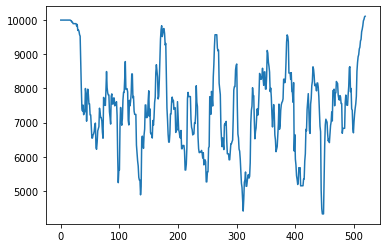

In [7]:
plt.plot(portfolio.curr_budget)

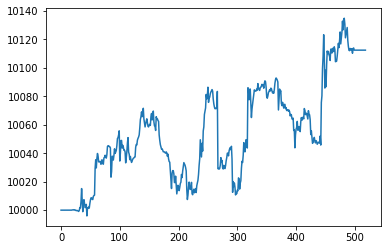

In [8]:
plt.plot(portfolio.portfolio_value)

In [9]:
dt.datetime.now() - dt.timedelta(29)

datetime.datetime(2023, 2, 4, 23, 29, 15, 561122)

In [10]:
ticker_data_dict['TMO']

,Open,High,Low,Close,Adj Close,Volume,RSI,macd,macd_signal,macd_hist,SMA200,SMA100
Datetime,,,,,,,,,,,,
2023-01-06 09:30:00-05:00,552.094971,555.349976,529.119995,529.140015,529.140015,271396,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-06 09:45:00-05:00,529.119995,532.609985,522.780029,528.762817,528.762817,254071,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-06 10:00:00-05:00,529.760010,535.919983,529.520020,529.789978,529.789978,135434,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-06 10:15:00-05:00,531.140015,531.669983,525.469971,526.390015,526.390015,95261,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-06 10:30:00-05:00,526.369995,530.679993,526.369995,528.530029,528.530029,99975,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-03 14:45:00-05:00,585.145020,585.409973,584.159973,584.349976,584.349976,42292,38.302001,-1.078353,-0.586334,-0.492020,576.111334,581.657122
2023-02-03 15:00:00-05:00,584.099976,586.080017,583.140015,585.789978,585.789978,72676,44.391346,-1.040844,-0.677236,-0.363608,576.203658,581.886621
2023-02-03 15:15:00-05:00,585.715027,587.835022,585.460022,586.619995,586.619995,82810,47.601506,-0.933382,-0.728465,-0.204917,576.289933,582.172721


In [11]:
portfolio.result

112.0

In [12]:
portfolio.positions

{'TMO': 0,
 'LIN': 0,
 'RTX': 0,
 'BAC': 0,
 'WFC': 0,
 'AMZN': 0,
 'V': 0,
 'TSLA': 0,
 'UNH': 0,
 'JNJ': 0,
 'LLY': 0,
 'PLD': 0,
 'AMT': 0,
 'EQIX': 0,
 'AAPL': 0,
 'MSFT': 0,
 'GOOG': 0,
 'XOM': 0,
 'CVX': 0,
 'SHEL': 0,
 'KO': 0,
 'PEP': 0,
 'UL': 0,
 'AVY': 0,
 'BBWI': 0,
 'CASY': 0,
 'NEE': 0,
 'EIX': 0,
 'DUK': 0,
 'CSCO': 0,
 'TMUS': 0,
 'VZ': 0,
 'BHP': 0,
 'RIO': 0,
 'VALE': 0}

In [13]:
df = pd.DataFrame(portfolio.trades)
df

,time,ticker,signal,price
0,2023-01-09 12:00:00-05:00,VALE,1,17.594999
1,2023-01-09 12:30:00-05:00,BBWI,1,45.240002
2,2023-01-09 13:00:00-05:00,VZ,1,41.580002
3,2023-01-09 14:30:00-05:00,EIX,1,67.980003
4,2023-01-09 14:45:00-05:00,BBWI,-1,44.900002
...,...,...,...,...
1017,2023-02-03 15:45:00-05:00,DUK,-1,100.775002
1018,2023-02-03 15:45:00-05:00,TMUS,-1,145.020004
1019,2023-02-03 15:45:00-05:00,VZ,-1,41.380001
1020,2023-02-03 15:45:00-05:00,RIO,-1,74.785004


In [14]:
df = pd.DataFrame(portfolio.trades)
df

,time,ticker,signal,price
0,2023-01-09 12:00:00-05:00,VALE,1,17.594999
1,2023-01-09 12:30:00-05:00,BBWI,1,45.240002
2,2023-01-09 13:00:00-05:00,VZ,1,41.580002
3,2023-01-09 14:30:00-05:00,EIX,1,67.980003
4,2023-01-09 14:45:00-05:00,BBWI,-1,44.900002
...,...,...,...,...
1017,2023-02-03 15:45:00-05:00,DUK,-1,100.775002
1018,2023-02-03 15:45:00-05:00,TMUS,-1,145.020004
1019,2023-02-03 15:45:00-05:00,VZ,-1,41.380001
1020,2023-02-03 15:45:00-05:00,RIO,-1,74.785004


In [15]:
portfolio.resturnsdfDaily

,ROI_change
date,
2023-01-06,0.000000
2023-01-09,-0.001650
2023-01-10,0.106937
2023-01-11,0.340269
2023-01-12,-0.036353
2023-01-13,0.226829
2023-01-17,-0.076152
2023-01-18,-0.345205
2023-01-19,0.060740
